In this notebook, we attempt to apply some basic and advanced machine learning algorithms to predict outcomes for the well-known Titanic Dataset.

#### Importing the libraries and data

In [2]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data

df = pd.read_csv('train.csv')


#### Exploratory data analysis and visualizations

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()  #exploring features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Understanding numerical data distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Understanding categorical feature distribution
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Howard Hugh ""Harry""",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [8]:
df.isna().sum()  #checking the number of NaNs per columns

# looks like we have 177 missing values in 'Age', 687 in 'Cabin' and 2 in 'Embarked'

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

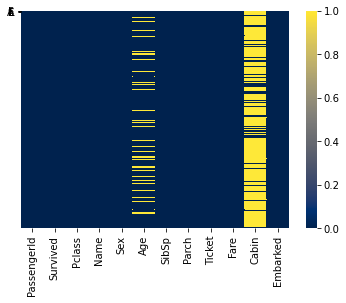

In [9]:
#Visualizing missing values
sns.heatmap(df.isnull(), yticklabels = 'FALSE', cbar= 'FALSE', cmap = 'cividis' )

In order to impute missing values, we'll need to do some more data analysis and pivoting to understand how the
features move w.r.t each other, essentially pivot tables

In [10]:
#Grouping by different categories for analysis
df[['Survived', 'Age']].groupby(['Survived'], as_index = False).mean()  #Average Age distribution by survival

,Survived,Age
0,0,30.626179
1,1,28.343690


In [11]:
df[['Survived', 'Pclass']].groupby(['Pclass'], as_index = False).mean() #Average survival by class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
df[['Survived', 'SibSp']].groupby(['SibSp'], as_index = False).mean() #Average survival by Sibling/Spouse count

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
df[['Survived', 'Sex']].groupby(['Sex'], as_index = False).mean() #Survival by sex

,Sex,Survived
0,female,0.742038
1,male,0.188908


Visualizing general data distribution

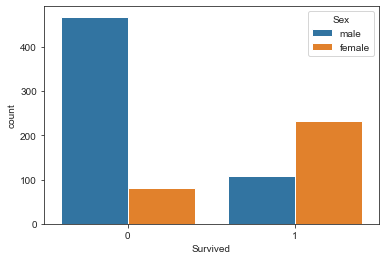

In [14]:
#Checking for count of "Survived" class with Sex with a countplot
sns.set_style("ticks")
sns.countplot(data= df, x = "Survived", hue = "Sex")

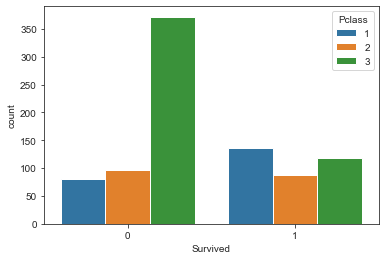

In [15]:
#Checking for count of "Survived" class with Class with a countplot
sns.set_style("ticks")
sns.countplot(data= df, x = "Survived", hue = "Pclass")

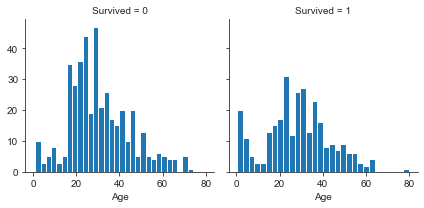

In [16]:
#Checking for distribution of age with a histogram with a displot/histplot
agehist = sns.FacetGrid(df, col='Survived')
agehist.map(plt.hist, 'Age', bins=30)

#### Imputations, Corrections and Feature Engineering

In [17]:
# We drop 'Cabin' as it has too many missing values to be imputed accurately and Cabin doesn't seem to have correlation 
# with survival rate with the available data. We also drop 'Ticket' and 'Fare' as they can be intuitively assumed to have no
# relation to 'Survived'

df = df.drop(columns = ['PassengerId','Name','Cabin','Ticket','Fare'], axis = 1)

In [18]:
# Creating a new feature 'FamilySize' and dropping 'Parch' 'SibSp'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df = df.drop(columns = ['SibSp','Parch'], axis = 1)

In [19]:
# Checking distribution of 'FamilySize' with 'Survived'
df[['FamilySize','Survived']].groupby(['Survived'], as_index = False).mean()

,Survived,FamilySize
0,0,1.883424
1,1,1.938596


In [20]:
# We create a function for imputing Age values categorically grouped by Survived. If Survived = 0, we impute Age as 30.
# If Survived = 1, we impute Age as 28
            
df['Age'] = np.where(df['Survived']==0, df['Age'].fillna(30.6), df['Age'].fillna(28.3))


#sample code
#data['column2'] = np.where((data['column1'] < 30)
                    #       & (data['column2'] ==2), #Identifies the case to apply to
                     #      data['column2'],      #This is the value that is inserted
                      #     data['column2'])      #This is the column that is affected

In [21]:
#Checking for imputation success - we see that it's a success
df[['Survived','Age']].tail()

,Survived,Age
886,0,27.0
887,1,19.0
888,0,30.6
889,1,26.0
890,0,32.0


In [100]:
# We fill the missing values in 'Embarked' with the most frequent

In [22]:
most_freq_port = df.Embarked.dropna().mode()[0] #finding the most frequent port

In [24]:
df['Embarked'] = df['Embarked'].fillna(most_freq_port) #filling the missing value

In [25]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,FamilySize
0,0,3,male,22.0,S,2
1,1,1,female,38.0,C,2
2,1,3,female,26.0,S,1
3,1,1,female,35.0,S,2
4,0,3,male,35.0,S,1


In [26]:
# Converting Categorical feature 'Sex' into Numeric(labels)
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [27]:
# Rerarranging the columns in DataFrame for readability 

df = df[['Pclass','Sex','Age','FamilySize','Embarked','Survived']]


In [28]:
# Separating matrix of features and target variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
print(X)

     Pclass  Sex   Age  FamilySize Embarked
0         3    0  22.0           2        S
1         1    1  38.0           2        C
2         3    1  26.0           1        S
3         1    1  35.0           2        S
4         3    0  35.0           1        S
..      ...  ...   ...         ...      ...
886       2    0  27.0           1        S
887       1    1  19.0           1        S
888       3    1  30.6           4        S
889       1    0  26.0           1        C
890       3    0  32.0           1        Q

[891 rows x 5 columns]


In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [4])], remainder='passthrough')
X = ct.fit_transform(X)

In [31]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Modeling

In [ ]:
# We'll try classification models for best accuracy, then use the best model out of these and apply hyperparameter tuning &
# cross-validation

##### Linear Classifier

In [32]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)    #instantiating the model
log_classifier.fit(X_train, y_train)     #fitting the model

LogisticRegression(random_state=0)

In [34]:
y_pred_lc = log_classifier.predict(X_test)  #predicting test set results

In [37]:
#creating confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score   
cm = confusion_matrix(y_test, y_pred_lc)
print(cm)
log_score = accuracy_score(y_test, y_pred_lc)
log_score

[[90 16]
 [19 54]]


0.8044692737430168

##### Decision Tree Classification

In [38]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [39]:
y_pred_DT = DT_classifier.predict(X_test)  #predicting test set results

In [40]:
cm_DT = confusion_matrix(y_test, y_pred_DT)
print(cm_DT)
DT_score = accuracy_score(y_test, y_pred_DT)
DT_score

[[90 16]
 [16 57]]


0.8212290502793296

##### Random Forest Classification

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [42]:
y_pred_RF = RF_classifier.predict(X_test)  #predicting test set results

In [43]:
cm_RF = confusion_matrix(y_test, y_pred_RF)
print(cm_RF)
RF_score = accuracy_score(y_test, y_pred_RF)
RF_score

[[87 19]
 [18 55]]


0.7932960893854749

##### KNN Classification

In [44]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 35, metric = 'minkowski', p = 2)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=35)

In [45]:
y_pred_KNN = KNN_classifier.predict(X_test) #predicting test set results

In [46]:
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print(cm_KNN)
KNN_score = accuracy_score(y_test, y_pred_KNN)
KNN_score

[[95 11]
 [42 31]]


0.7039106145251397

#### Hyperparameter Tuning using GridSearchCV

In [48]:
# We import GSCV from sklearn and fit it
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini','entropy'],
              'max_depth': [1, 10, 15,25, 30]}]
grid_search = GridSearchCV(estimator = DT_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [49]:
grid_score = grid_search.best_score_
grid_score

0.8315140845070422

In [50]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [51]:
#creating a new model with tuned hyperparameters
DT_classifierGS = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10, random_state = 0) 
DT_classifierGS.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)

In [52]:
y_pred_DTGS = DT_classifierGS.predict(X_test) #predicting test set results

In [53]:
cm_DTGS = confusion_matrix(y_test, y_pred_DTGS)
print(cm_DTGS)
DTGS_score = accuracy_score(y_test, y_pred_DTGS)
DTGS_score

[[93 13]
 [21 52]]


0.8100558659217877

#### Results

In [54]:
Results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 
              'GridSearchCV', 'Decision Tree Opt'],
    'Score': [log_score, DT_score, RF_score, KNN_score, 
              grid_score, DTGS_score]})
Results.sort_values(by='Score', ascending=False)

,Model,Score
4,GridSearchCV,0.831514
1,Decision Tree,0.821229
5,Decision Tree Opt,0.810056
0,Logistic Regression,0.804469
2,Random Forest,0.793296
3,KNN,0.703911
